#### ANL Sprint 2017

HSC-DR1 LSS Sprint: Shows how to generate the bright object mask


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from astropy.table import Table
from dataCleanUp import dataCleanUp
import flatmaps as fm
from flatMask import createMask
from createMaps import createMeanStdMaps,createCountsMap

Read in the data (both forced and random tables)

In [2]:
HSCdatapath= '/global/cscratch1/sd/damonge/HSC/'
HSCFiles= os.listdir(HSCdatapath)
HSCFiles= ['HSC_WIDE_GAMA15H_forced.fits', 'HSC_WIDE_GAMA15H_random.fits'] # now random have is primary

In [3]:
HSCFiles= [HSCdatapath+f for f in HSCFiles]
HSCFiles

['/global/cscratch1/sd/damonge/HSC/HSC_WIDE_GAMA15H_forced.fits',
 '/global/cscratch1/sd/damonge/HSC/HSC_WIDE_GAMA15H_random.fits']

In [4]:
HSCdata= {}
for filename in HSCFiles:
    key= filename.split('WIDE_')[1].split('.fits')[0]
    dat = Table.read(filename, format='fits')
    HSCdata[key] = dat.to_pandas()
    
HSCFieldTag= key.split('_')[0]  # just the field tag.

In [5]:
# clean up
for key in HSCdata:
    print key
    HSCdata[key]= dataCleanUp(HSCdata[key])

GAMA15H_random
Given size of the dataframe:  (8121501, 60)
Dropped 30 isnull columns.
Dropped 8121471 rows since they contained nan entries.
idetect_is_primary in dataframe, so dropping objects with idetect_is_primary= False.
Dropped 2022870 rows based on idetect_is_primary= False.
Final size of the dataframe:  (6098631, 29)

GAMA15H_forced
Given size of the dataframe:  (7681225, 196)
Dropped 98 isnull columns.
Dropped 7681127 rows since they contained nan entries.
Final size of the dataframe:  (6139128, 98)



Create bright-object mask

[1334, 3168] [667, 1584]


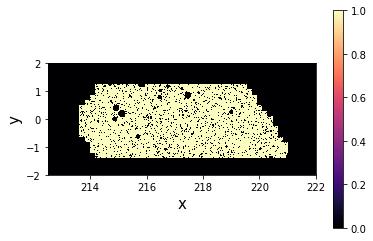

In [6]:
resolution=0.006
fsg0= fm.FlatMapInfo([212.5,222.],[-2.,2.], dx=resolution,dy=resolution)
mask,fsg=createMask(HSCdata['GAMA15H_random']['ra'],HSCdata['GAMA15H_random']['dec'],
                    [HSCdata['GAMA15H_random']['iflags_pixel_bright_object_center'],
                     HSCdata['GAMA15H_random']['iflags_pixel_bright_object_any']],fsg0,0.003)
fsg.view_map(mask)
print fsg.get_dims(),fsg0.get_dims()

Plot number density (including basic magnitude cut) with and without mask

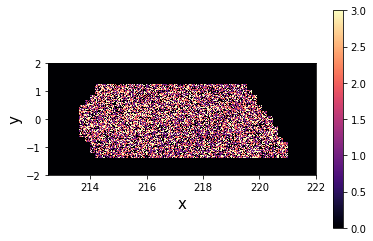

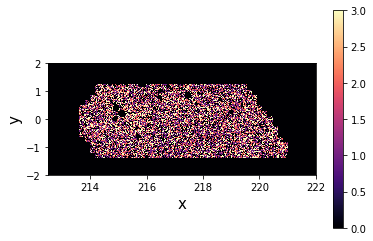

In [7]:
tab=HSCdata['GAMA15H_forced']
mpd=createCountsMap(tab['ra'][tab['icmodel_mag']-tab['a_i']<25.],tab['dec'][tab['icmodel_mag']-tab['a_i']<25.],fsg)
fsg.view_map(mpd)
fsg.view_map(mpd*mask)